# HW2 - Arian Mohammadkhani

### The dataset used for this task (file: Housing.csv) contains 2,930 records related to the sale of residential houses in one of the cities in the United States, spanning the years 2006 to 2010. It includes the sale prices of houses based on 80 features, such as lot area, number of rooms, year built, neighborhood, roof type, and construction quality (ranging from poor to excellent).
### Our goal is to find the best model that can predict house prices based on these features.


# library  

In [1]:
from pandas import *
from numpy import * 
from seaborn import heatmap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score , train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures , LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# 1

In [2]:
data_frame = read_csv('Housing.csv') 
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [3]:
data_frame.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# 2

In [4]:
label_encoder = LabelEncoder()
for column in data_frame.select_dtypes(include='object').columns:
    data_frame[column] = label_encoder.fit_transform(data_frame[column])
data_frame.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,5,141.0,31770,1,2,0,3,...,0,4,4,5,0,5,2010,9,4,215000
1,2,526350040,20,4,80.0,11622,1,2,3,3,...,0,4,2,5,0,6,2010,9,4,105000
2,3,526351010,20,5,81.0,14267,1,2,0,3,...,0,4,4,1,12500,6,2010,9,4,172000
3,4,526353030,20,5,93.0,11160,1,2,3,3,...,0,4,4,5,0,4,2010,9,4,244000
4,5,527105010,60,5,74.0,13830,1,2,0,3,...,0,4,2,5,0,3,2010,9,4,189900


In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   int32  
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   int32  
 7   Alley            2930 non-null   int32  
 8   Lot Shape        2930 non-null   int32  
 9   Land Contour     2930 non-null   int32  
 10  Utilities        2930 non-null   int32  
 11  Lot Config       2930 non-null   int32  
 12  Land Slope       2930 non-null   int32  
 13  Neighborhood     2930 non-null   int32  
 14  Condition 1      2930 non-null   int32  
 15  Condition 2      2930 non-null   int32  
 16  Bldg Type        2930 non-null   int32  
 17  House Style   

In [6]:
missing_v = data_frame.isnull().sum()
missing_v = missing_v[missing_v > 0]
missing_v

Lot Frontage      490
Mas Vnr Area       23
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     159
Garage Cars         1
Garage Area         1
dtype: int64

In [7]:
def detect_outliers_iqr(df):
    outlier_info = {}
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            outlier_info[col] = {
                'count': len(outliers),
                'percent': round(len(outliers) / len(df) * 100, 2)
            }

    return outlier_info
outliers_summary = detect_outliers_iqr(data_frame)
for col, info in outliers_summary.items():
    print(f"🔍 Column: {col} | Outliers: {info['count']} rows ({info['percent']}%)")

🔍 Column: MS SubClass | Outliers: 208 rows (7.1%)
🔍 Column: Lot Frontage | Outliers: 187 rows (6.38%)
🔍 Column: Lot Area | Outliers: 127 rows (4.33%)
🔍 Column: Overall Qual | Outliers: 4 rows (0.14%)
🔍 Column: Overall Cond | Outliers: 252 rows (8.6%)
🔍 Column: Year Built | Outliers: 9 rows (0.31%)
🔍 Column: Mas Vnr Area | Outliers: 200 rows (6.83%)
🔍 Column: BsmtFin SF 1 | Outliers: 15 rows (0.51%)
🔍 Column: BsmtFin SF 2 | Outliers: 351 rows (11.98%)
🔍 Column: Bsmt Unf SF | Outliers: 56 rows (1.91%)
🔍 Column: Total Bsmt SF | Outliers: 123 rows (4.2%)
🔍 Column: 1st Flr SF | Outliers: 43 rows (1.47%)
🔍 Column: 2nd Flr SF | Outliers: 8 rows (0.27%)
🔍 Column: Low Qual Fin SF | Outliers: 40 rows (1.37%)
🔍 Column: Gr Liv Area | Outliers: 75 rows (2.56%)
🔍 Column: Bsmt Full Bath | Outliers: 2 rows (0.07%)
🔍 Column: Bsmt Half Bath | Outliers: 175 rows (5.97%)
🔍 Column: Full Bath | Outliers: 4 rows (0.14%)
🔍 Column: Bedroom AbvGr | Outliers: 78 rows (2.66%)
🔍 Column: Kitchen AbvGr | Outliers: 1

In [8]:
def remove_outliers_iqr(df):
    df_clean = df.copy()
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    for col in numeric_columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        iqr = Q3 - Q1
        lower_bound = Q1 - 1.5 * iqr
        upper_bound = Q3 + 1.5 * iqr

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean
data_frame_cleaned = remove_outliers_iqr(data_frame)
modified_df = data_frame_cleaned

In [9]:
for column in modified_df.columns:
    missing_value = modified_df[column].isnull().sum()
    if missing_value > 0:
        if missing_value > 1000:
            modified_df.drop(columns=[column], inplace=True)
        else:
            if modified_df[column].dtype == 'float64' and modified_df[column].dtype == 'int64' :
                median_data = modified_df[column].median()
                modified_df[column].fillna(median_data, inplace=True)
            else:
                mode_data = modified_df[column].mode()[0]
                modified_df[column].fillna(mode_data, inplace=True)
    top_freq_ratio = modified_df[column].value_counts(normalize=True).values[0]
    if top_freq_ratio > 0.70:
        modified_df.drop(columns=[column], inplace=True)
modified_df.drop(columns=["Order"], inplace=True)

In [10]:
missing_v1 = modified_df.isnull().sum()
missing_v1 = missing_v1[missing_v1 > 0]
missing_v1

Series([], dtype: int64)

In [11]:
modified_df.head()

,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Neighborhood,House Style,Overall Qual,Year Built,Year Remod/Add,...,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
4,527105010,60,74.0,13830,0,8,5,5,1997,1998,...,4,1997.0,0,2.0,482.0,212,34,3,2010,189900
5,527105030,60,78.0,9978,0,8,5,6,1998,1998,...,2,1998.0,0,2.0,470.0,360,36,6,2010,195500
8,527146030,120,39.0,5389,0,25,2,8,1995,1996,...,4,1995.0,1,2.0,608.0,237,152,3,2010,236500
9,527162130,60,60.0,7500,3,8,5,7,1999,1999,...,4,1999.0,0,2.0,442.0,140,60,6,2010,189000
10,527163010,60,75.0,10000,0,8,5,6,1993,1994,...,4,1993.0,0,2.0,440.0,157,84,4,2010,175900


# 3

In [12]:
modified_df.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Neighborhood,House Style,Overall Qual,Year Built,Year Remod/Add,...,Fireplace Qu,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,SalePrice
count,8.620000e+02,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,...,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000,862.000000
mean,6.996168e+08,49.071926,68.185615,9067.616009,1.969838,13.663573,3.024362,6.344548,1983.895592,1989.667053,...,3.841067,1986.245940,1.040603,1.901392,497.585847,90.875870,43.380510,6.097448,2007.751740,182609.715777
std,1.880622e+08,31.700866,15.062406,2493.452117,1.414713,7.581722,1.815051,1.269068,25.836810,20.248269,...,1.389870,23.538139,0.800391,0.592852,163.109474,97.463616,44.346084,2.645930,1.308807,56021.646549
min,5.263021e+08,20.000000,30.000000,3010.000000,0.000000,0.000000,0.000000,2.000000,1890.000000,1950.000000,...,0.000000,1895.000000,0.000000,1.000000,160.000000,0.000000,0.000000,1.000000,2006.000000,60000.000000
25%,5.283315e+08,20.000000,60.000000,7606.250000,0.000000,6.000000,2.000000,5.000000,1963.000000,1973.000000,...,2.000000,1968.000000,0.000000,2.000000,393.250000,0.000000,0.000000,4.000000,2007.000000,138100.000000
50%,5.353262e+08,50.000000,70.000000,9030.500000,3.000000,15.000000,2.000000,6.000000,1998.000000,2000.000000,...,5.000000,1998.000000,1.000000,2.000000,484.000000,100.000000,36.000000,6.000000,2008.000000,178000.000000
75%,9.071870e+08,60.000000,78.000000,10572.000000,3.000000,20.000000,5.000000,7.000000,2005.000000,2006.000000,...,5.000000,2005.000000,2.000000,2.000000,587.500000,168.000000,68.000000,8.000000,2009.000000,215000.000000
max,9.241510e+08,120.000000,110.000000,16285.000000,3.000000,27.000000,7.000000,10.000000,2010.000000,2010.000000,...,5.000000,2010.000000,2.000000,3.000000,908.000000,413.000000,175.000000,12.000000,2010.000000,338500.000000


# 4

In [13]:
correlation_matrix = modified_df.corr(numeric_only=True)
correlation_with_price = correlation_matrix['SalePrice']
sorted_corr = correlation_with_price.sort_values(ascending=False)
strong_corr = sorted_corr[abs(sorted_corr) > 0.5]
strong_corr

SalePrice         1.000000
Overall Qual      0.831094
Gr Liv Area       0.724245
Garage Cars       0.717507
Year Built        0.705330
Garage Area       0.703422
Garage Yr Blt     0.669893
Full Bath         0.665367
Year Remod/Add    0.639692
Foundation        0.610429
Total Bsmt SF     0.580778
1st Flr SF        0.547298
TotRms AbvGrd     0.534539
Garage Finish    -0.529050
Heating QC       -0.530653
Kitchen Qual     -0.659560
Bsmt Qual        -0.668972
Exter Qual       -0.709607
Name: SalePrice, dtype: float64

# 5

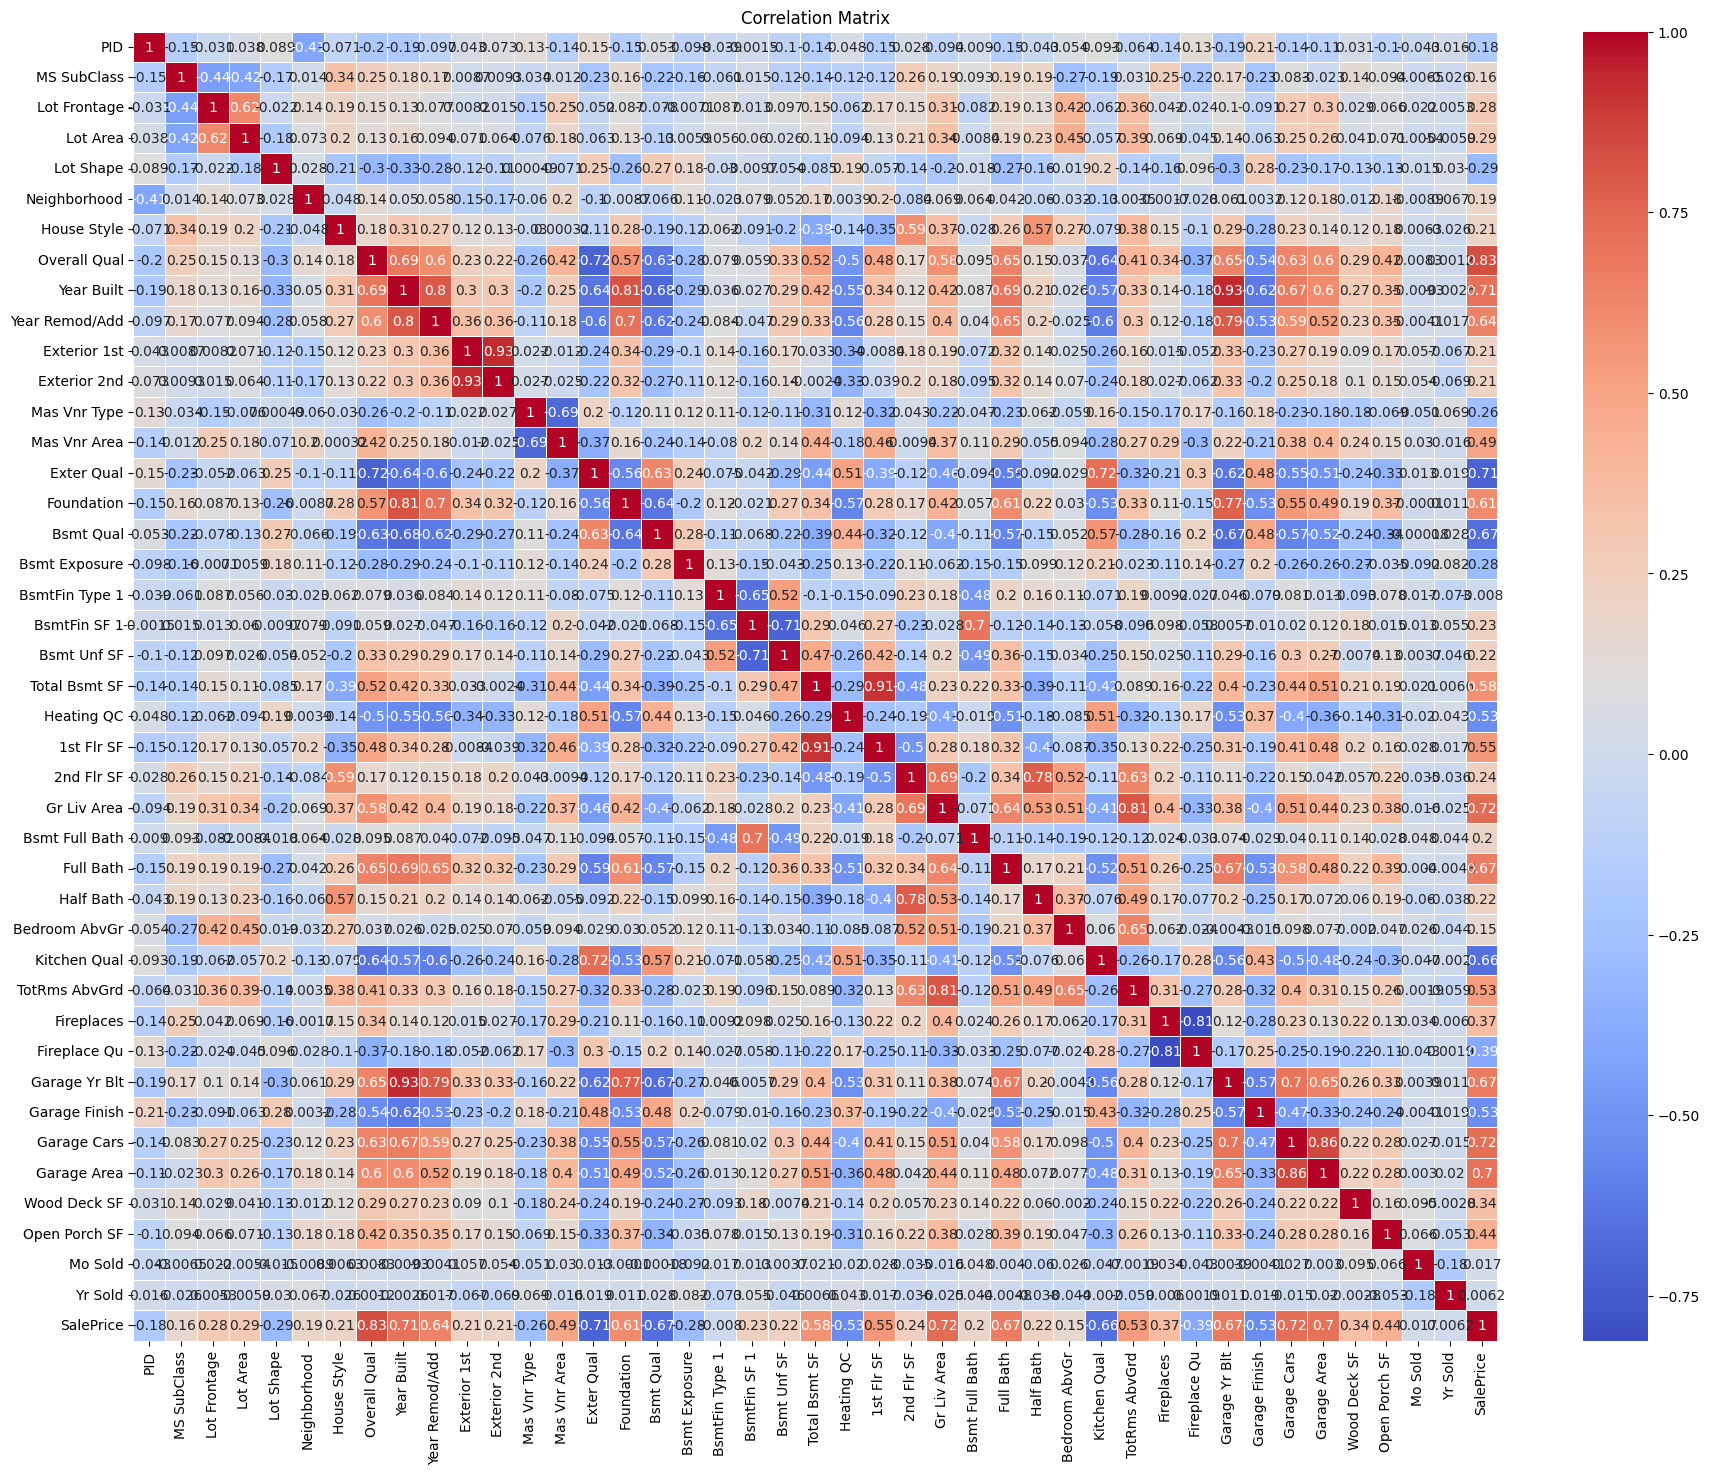

In [14]:
correlation_matrix = modified_df.corr(numeric_only=True)
plt.figure(figsize=(22,17))
heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

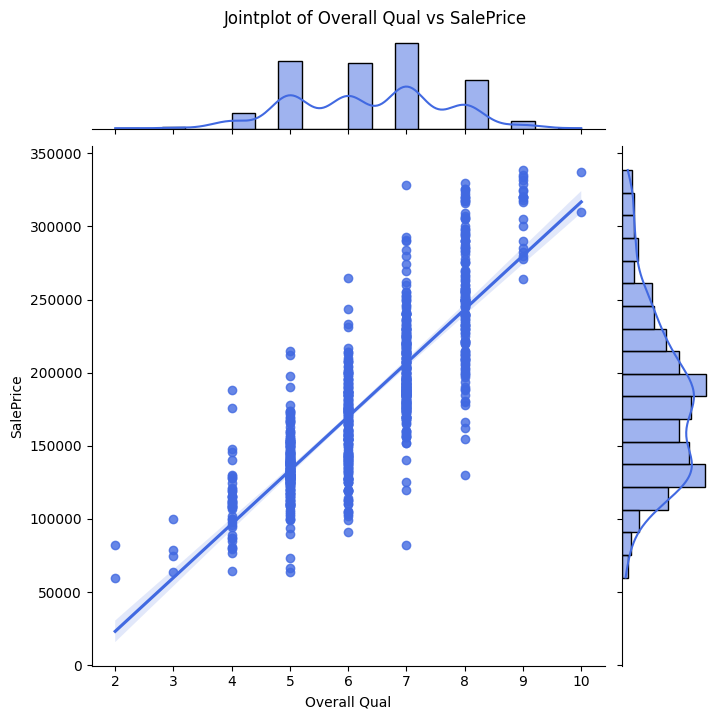

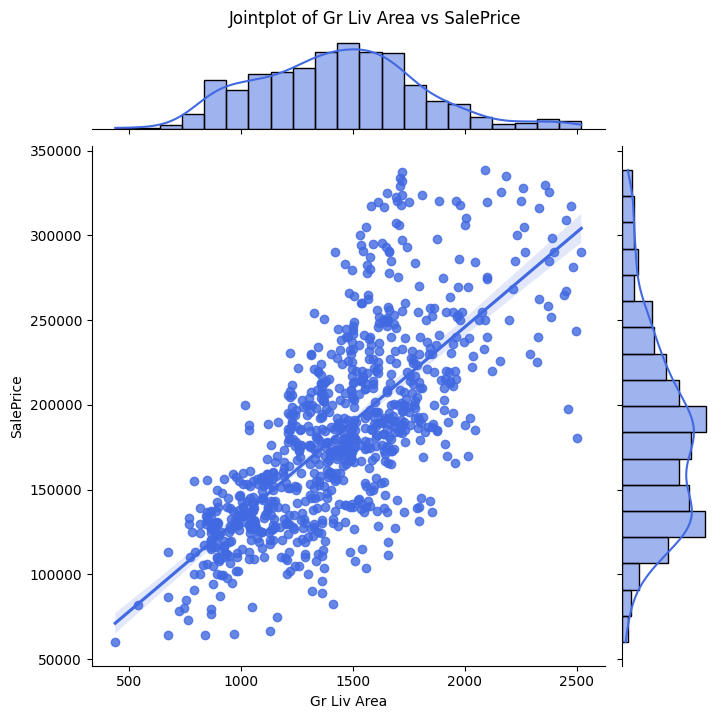

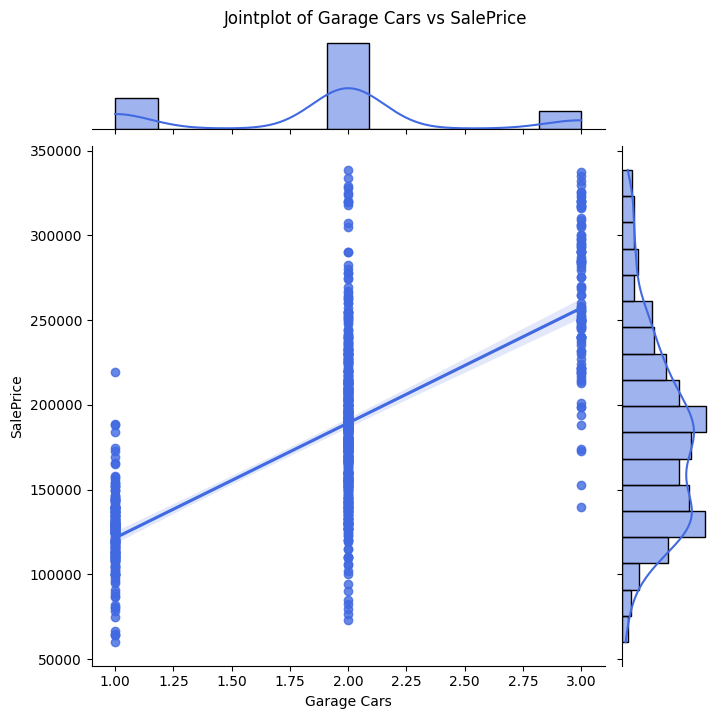

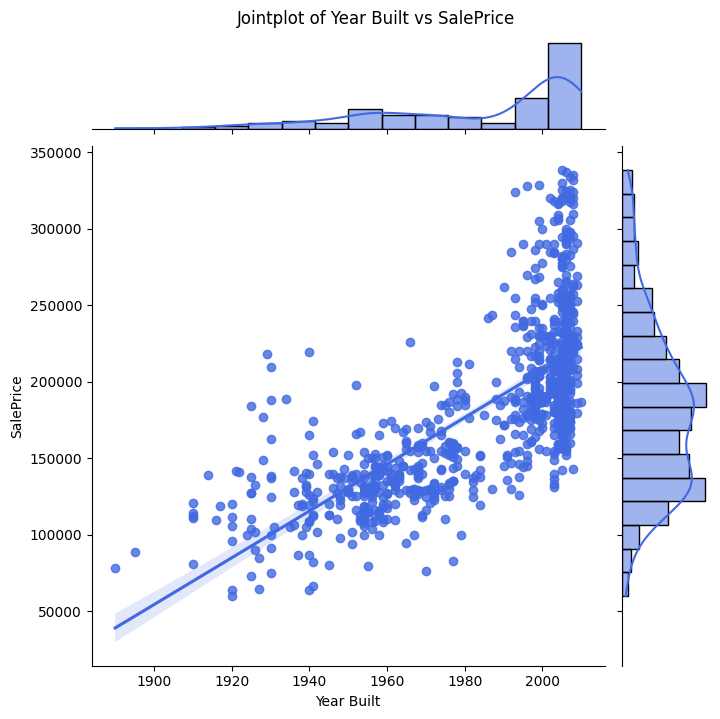

In [15]:
important_features = strong_corr.drop('SalePrice').index

top_features = important_features[:4]

for feature in top_features:
    plot = sns.jointplot(data=modified_df, x=feature, y='SalePrice', kind='reg', height=7, color='royalblue')
    plot.fig.suptitle(f'Jointplot of {feature} vs SalePrice', y=1.02)
    plt.show()

# 6

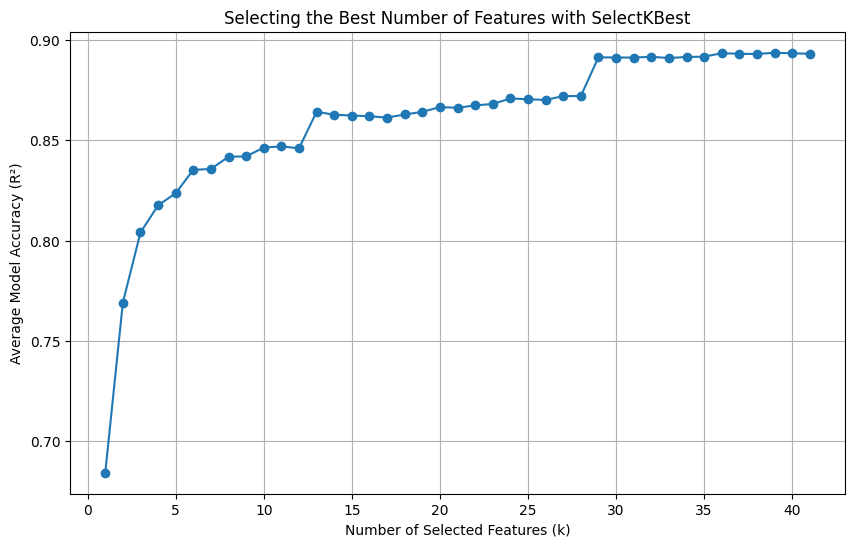

In [16]:
X = modified_df.drop('SalePrice', axis=1)
y = modified_df['SalePrice']
X = get_dummies(X, drop_first=True)
scores = []
k_values = range(1, min(len(X.columns), 46))  
for k in k_values:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X, y)
    model = LinearRegression()
    cv_score = cross_val_score(model, X_selected, y, cv=5, scoring='r2').mean()
    scores.append(cv_score)
    
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.xlabel('Number of Selected Features (k)')
plt.ylabel('Average Model Accuracy (R²)')
plt.title('Selecting the Best Number of Features with SelectKBest')
plt.grid(True)
plt.show()

# 7

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 8

In [18]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [20]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

C:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.41294e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [21]:
# Polynomial Regression (degree=2 for example)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

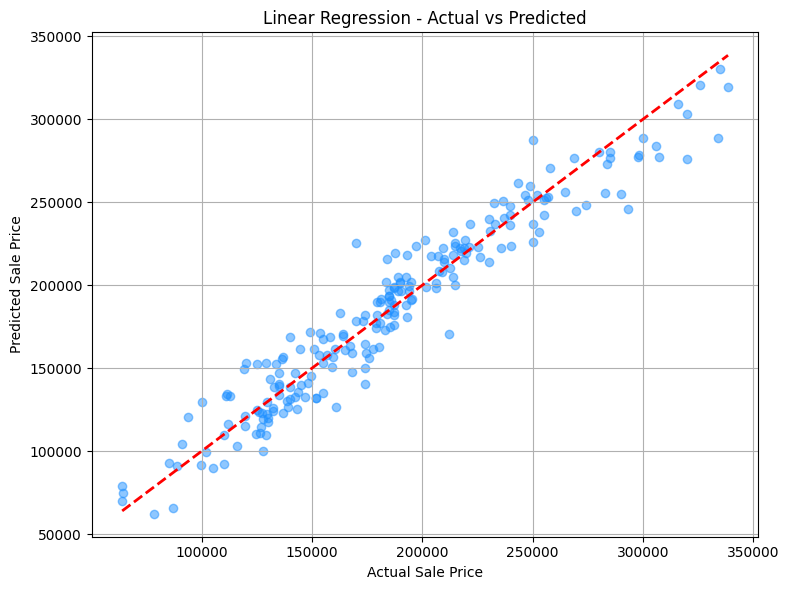

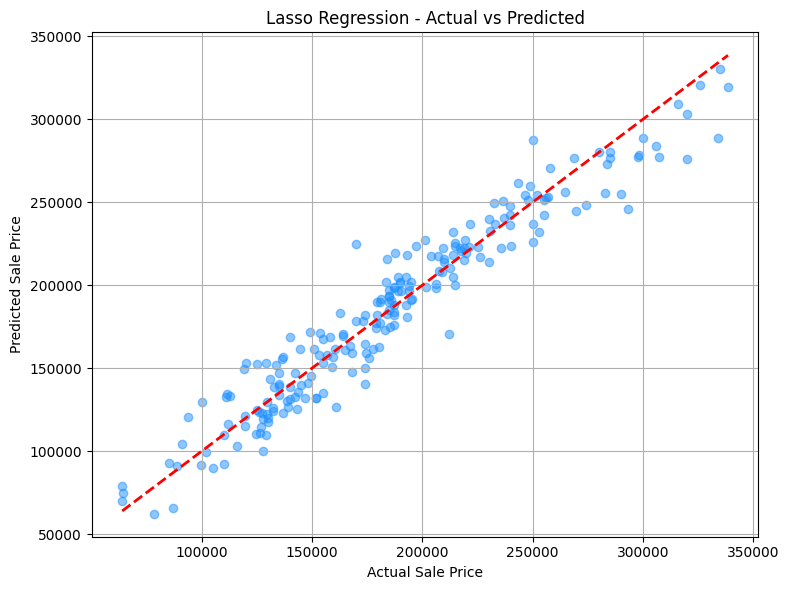

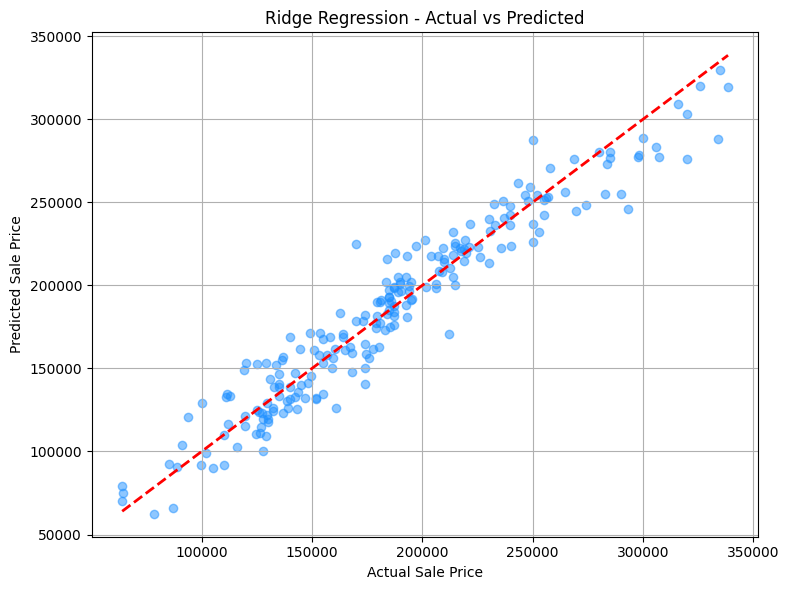

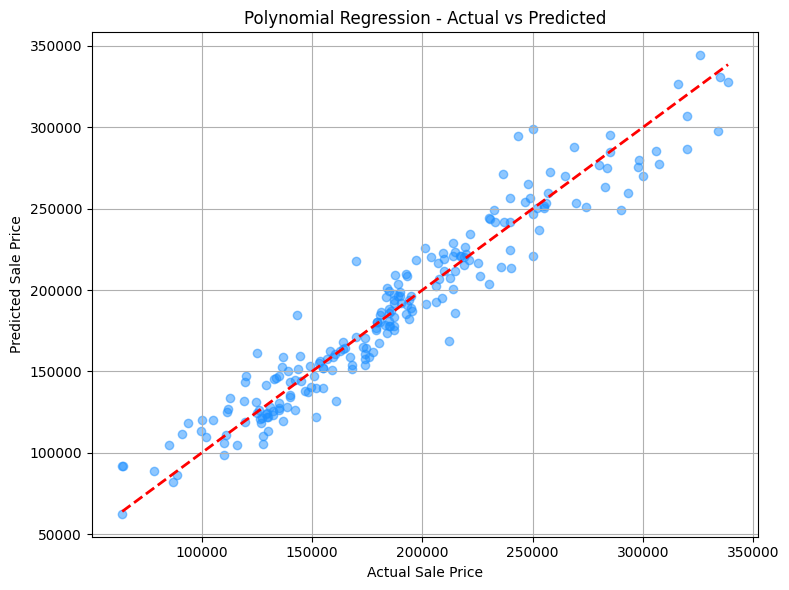

In [22]:
def plot_predictions(model, X_test, y_test, model_name="Model"):
    predictions = model.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.5, color='dodgerblue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Sale Price")
    plt.ylabel("Predicted Sale Price")
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
plot_predictions(linear_model, X_test, y_test, "Linear Regression")
plot_predictions(lasso_model, X_test, y_test, "Lasso Regression")
plot_predictions(ridge_model, X_test, y_test, "Ridge Regression")
plot_predictions(poly_model, X_test, y_test, "Polynomial Regression")

# 9

In [23]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    predictions = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    rms = sqrt(mean_squared_error(y_test, predictions))
    print(f"{model_name} => R²: {r2:.4f}, RMS: {rms:.2f}")

evaluate_model(linear_model, X_test, y_test, "Linear Regression")
evaluate_model(lasso_model, X_test, y_test, "Lasso Regression")
evaluate_model(ridge_model, X_test, y_test, "Ridge Regression")
evaluate_model(poly_model, X_test, y_test, "Polynomial Regression")

Linear Regression => R²: 0.9267, RMS: 15777.69
Lasso Regression => R²: 0.9267, RMS: 15776.99
Ridge Regression => R²: 0.9267, RMS: 15772.91
Polynomial Regression => R²: 0.9290, RMS: 15524.22


# 10

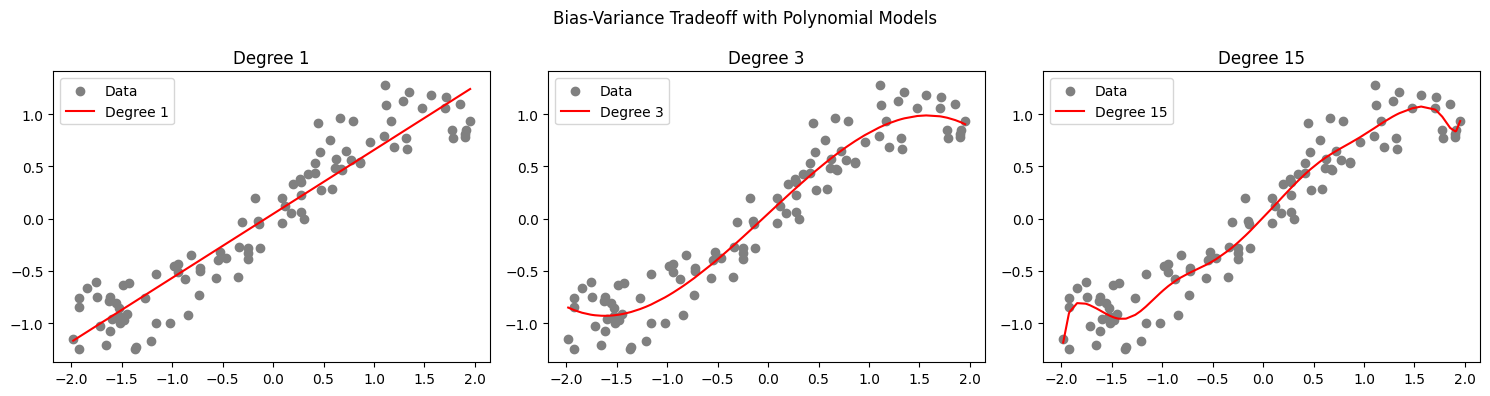

In [24]:
random.seed(0)
X1 = sort(random.rand(100, 1) * 4 - 2, axis=0)
y1 = sin(X1).ravel() + random.randn(100) * 0.2


degrees = [1, 3, 15]
plt.figure(figsize=(15, 4))
for i, d in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X1, y1)
    y_pred = model.predict(X1)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X1, y1, color='gray', label='Data')
    plt.plot(X1, y_pred, color='red', label=f'Degree {d}')
    plt.title(f"Degree {d}")
    plt.legend()
plt.suptitle("Bias-Variance Tradeoff with Polynomial Models")
plt.tight_layout()
plt.show()
